this project will be to analyze the comments on every chapter of against the gods from 1 to 1450 to see which chapters are the best/controversial/most engaging (assuming number of comments on a chapter means its better/controversial/more engaging). 

thoughts: normalize and clean data based on growth of popularity of series? or see which arcs are most popular, based on engagement rates on a weekly basis?

In [89]:
from bs4 import BeautifulSoup
import requests
import time

In [1]:
from selenium import webdriver

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait #makes it wait
from selenium.webdriver.support import expected_conditions as EC #waits until condition met
from selenium.common.exceptions import TimeoutException #if neither wait nor condition met, throw exception
from selenium.common.exceptions import NoSuchElementException

chrome_path = r'/Users/thomas/Downloads/chromedriver'
driver = webdriver.Chrome(chrome_path)
try:
    driver.get('https://www.wuxiaworld.com/novel/against-the-gods/atg-chapter-1043')
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") #scroll to bottom of page 
    time.sleep(3) #3 second wait while number of reviews load
    comments = driver.find_element_by_id("comments").text.split()[0]
    print(comments)#get only the number of comments
    driver.quit() #close selenium tab
except NoSuchElementException: #testing this here it messed up on chapter 1043 and 1044 in final data collection
    comments = 0
    print(comments)
    driver.quit()


NameError: name 'time' is not defined

In [91]:
source = requests.get("https://www.wuxiaworld.com/novel/against-the-gods/atg-chapter-1").text
soup = BeautifulSoup(source, "html5lib")

In [92]:
chapter = soup.find('div', class_='panel panel-default').h4.text.split()[1]
print(chapter)
print('')

#commentCount = soup.find('div', {'id':'comments'}).h4.text
#print(commentCount)
#this is javascript dynamic loaded text from users, so gotta use selenium

date = soup.find('meta', property='article:published_time')["content"].split()[0]
print(date)
print('')


1

06/13/2015



ok now we have all 3 elements, we can now write them to a csv

In [93]:
import csv
import pandas as pd
#write to csv now
#all this should be before the for loop
#csv_file = open('atg_comment_data.csv', 'w')

#csv_writer = csv.write(csv_file)
#csv_writer.writerow(['chapter', 'comments', 'date']) #creating header row

#ok now at the end of the for loop
#actually writing the data in cells
#csv_writer.writerow([chapter, comments, date])

#ok NOW outside of the loop, close the file
#csv_file.close()


with open('atg_comment_data.csv', 'w') as new_file:
    csv_writer = csv.writer(new_file)

    #header row
    #this needs to be outside of loop
    csv_writer.writerow(['chapter', 'comments','date']) 
    
    
    #for data in totaldata:
    #this is inside loop
    csv_writer.writerow([chapter, comments, date])
   
    #then outside of loop, close the file
    #new_file.close()
    
df = pd.read_csv('atg_comment_data.csv')
df.head()

,chapter,comments,date
0,1,80,06/13/2015


ok sweet, test complete now we can run the actual data

In [3]:
from bs4 import BeautifulSoup
import requests
import time
import csv 

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait #makes it wait
from selenium.webdriver.support import expected_conditions as EC #waits until condition met
from selenium.common.exceptions import TimeoutException #if neither wait nor condition met, throw exception
from selenium.common.exceptions import TimeoutException #if neither wait nor condition met, throw exception
from selenium.common.exceptions import NoSuchElementException #added this after it messed up in chap.1043

with open('atg_comment_data.csv', 'w') as new_file:
    csv_writer = csv.writer(new_file)

    #header row
    #this needs to be outside of loop
    csv_writer.writerow(['chapter', 'comments','date']) 
    
    for page in range(1040, 1049):
        url = "https://www.wuxiaworld.com/novel/against-the-gods/atg-chapter-" + str(page)
        
        chrome_path = r'/Users/thomas/Downloads/chromedriver'
        driver = webdriver.Chrome(chrome_path)
        
        driver.set_page_load_timeout(5)
        try:
            driver.get(url)
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") #scroll to bottom of page 
            time.sleep(1) #waits x seconds while number of reviews load
            comments = driver.find_element_by_id('comments').text.split()[0] 
            driver.quit() #close selenium tab
        except (NoSuchElementException, TypeError, TimeoutException):
            comments = 0
            driver.quit()
        
        source = requests.get(url).text
        soup = BeautifulSoup(source, "html5lib")
  
        try:
            chapter = soup.find('div', class_='panel panel-default').h4.text.split()[1]
            date = soup.find('meta', property='article:published_time')["content"].split()[0]
        except TypeError:
            chapter = 0
            date = 0
        
        csv_writer.writerow([chapter, comments, date])
    
    new_file.close()

AttributeError: 'NoneType' object has no attribute 'text'

now to clean the data, display it, and visualize it

In [135]:
import pandas as pd
import numpy as np
from IPython.display import display

data1 = pd.read_csv("atg_comment_data1.csv") 
data2 = pd.read_csv("atg_comment_data2.csv")  
data = data1.append(data2)

pd.options.display.max_rows = 1500

#testing different ways to make sure 0 commented out 
#indexZeros = data[data['comments'] ==0].index #Get names of indexes for which comments has 0
#data.drop(indexZeros , inplace=True) # Delete those row indexes from dataFrame
#indexZeros = data[data['comments'] =='0'].index #Get names of indexes for which comments has '0
#data.drop(indexZeros , inplace=True) # Delete those row indexes from dataFrame

#get rid of row with value 'commenting'
indexCommenting = data[data['comments'] =='Commenting'].index
data.drop(indexCommenting , inplace=True)

#get rid of rows where comment column has a value of 0
data = data[data.comments !='0']
data = data[data.comments !=0]

data.to_csv(r"atg_final_data.csv")

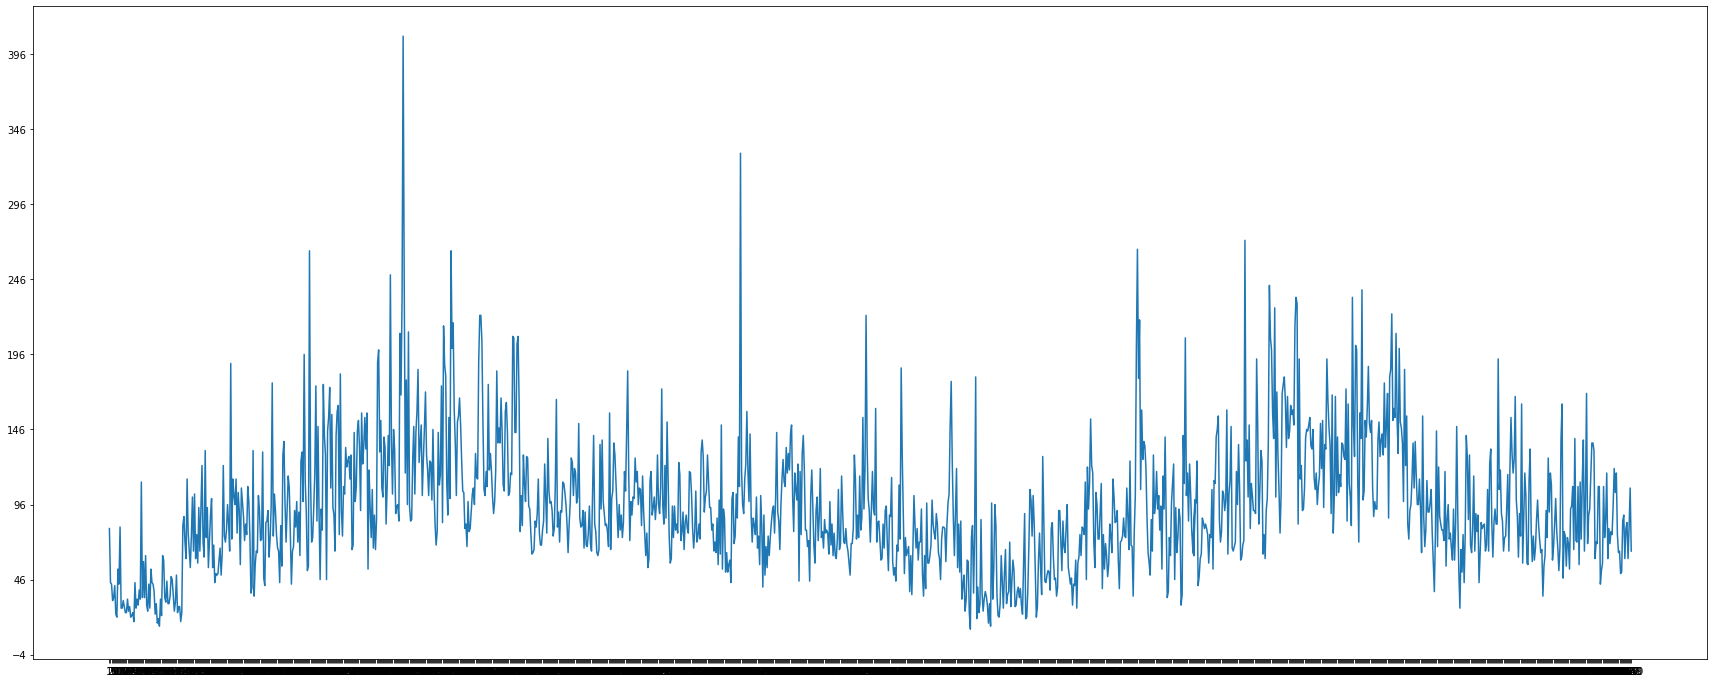

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure

data = pd.read_csv("atg_final_data.csv") 

plt.figure(figsize=(30,12))
#plt.xticks(np.arange(1,1470,step=50))
plt.yticks(np.arange(-4, 1470, step=50))
plt.plot(data.chapter, data.comments)
plt.show()

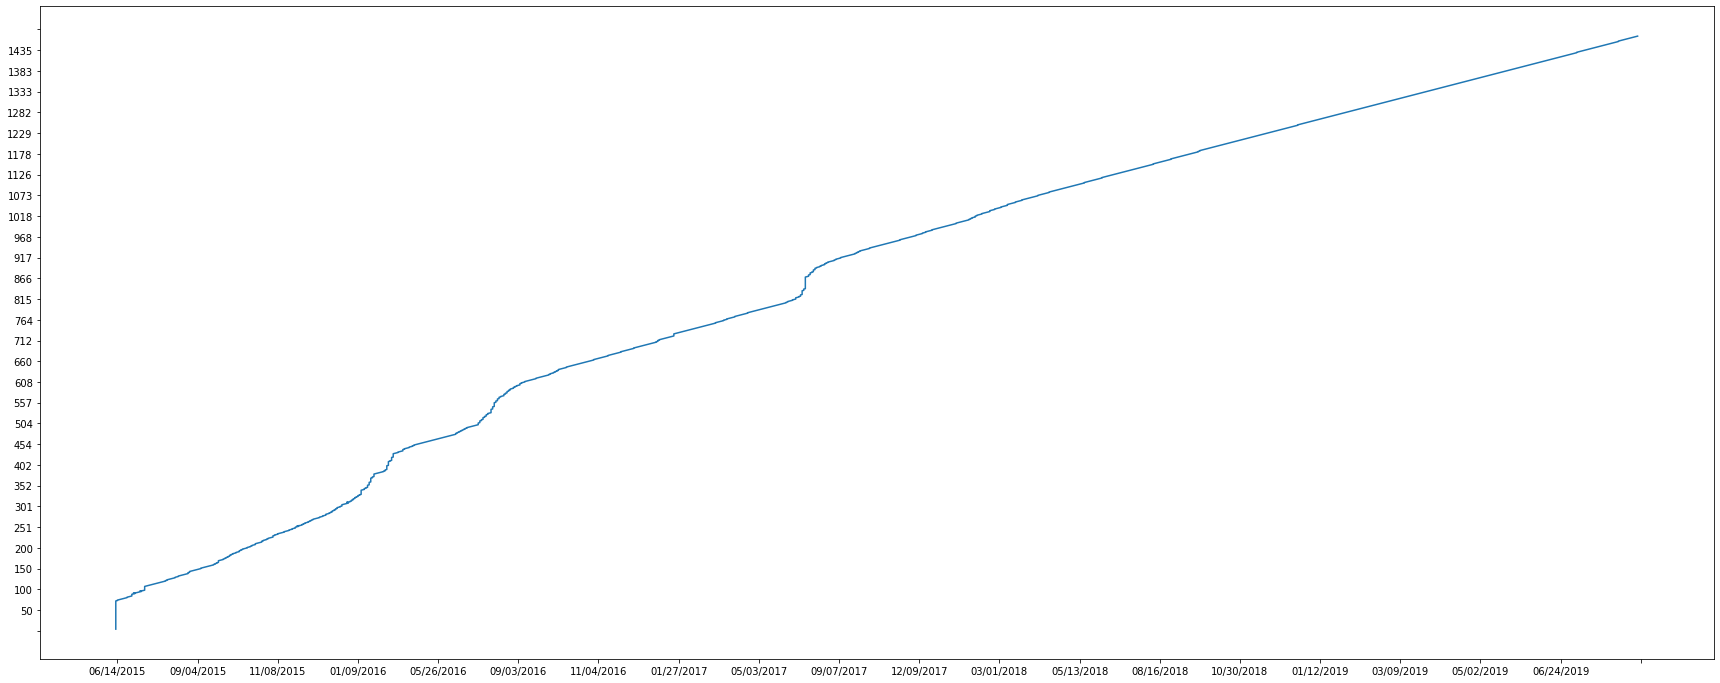

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure

data = pd.read_csv("atg_final_data.csv") 

plt.figure(figsize=(30,12))
plt.xticks(np.arange(1,1470,step=50))
plt.yticks(np.arange(-4, 1470, step=50))
plt.plot(data.date, data.chapter)
plt.show()

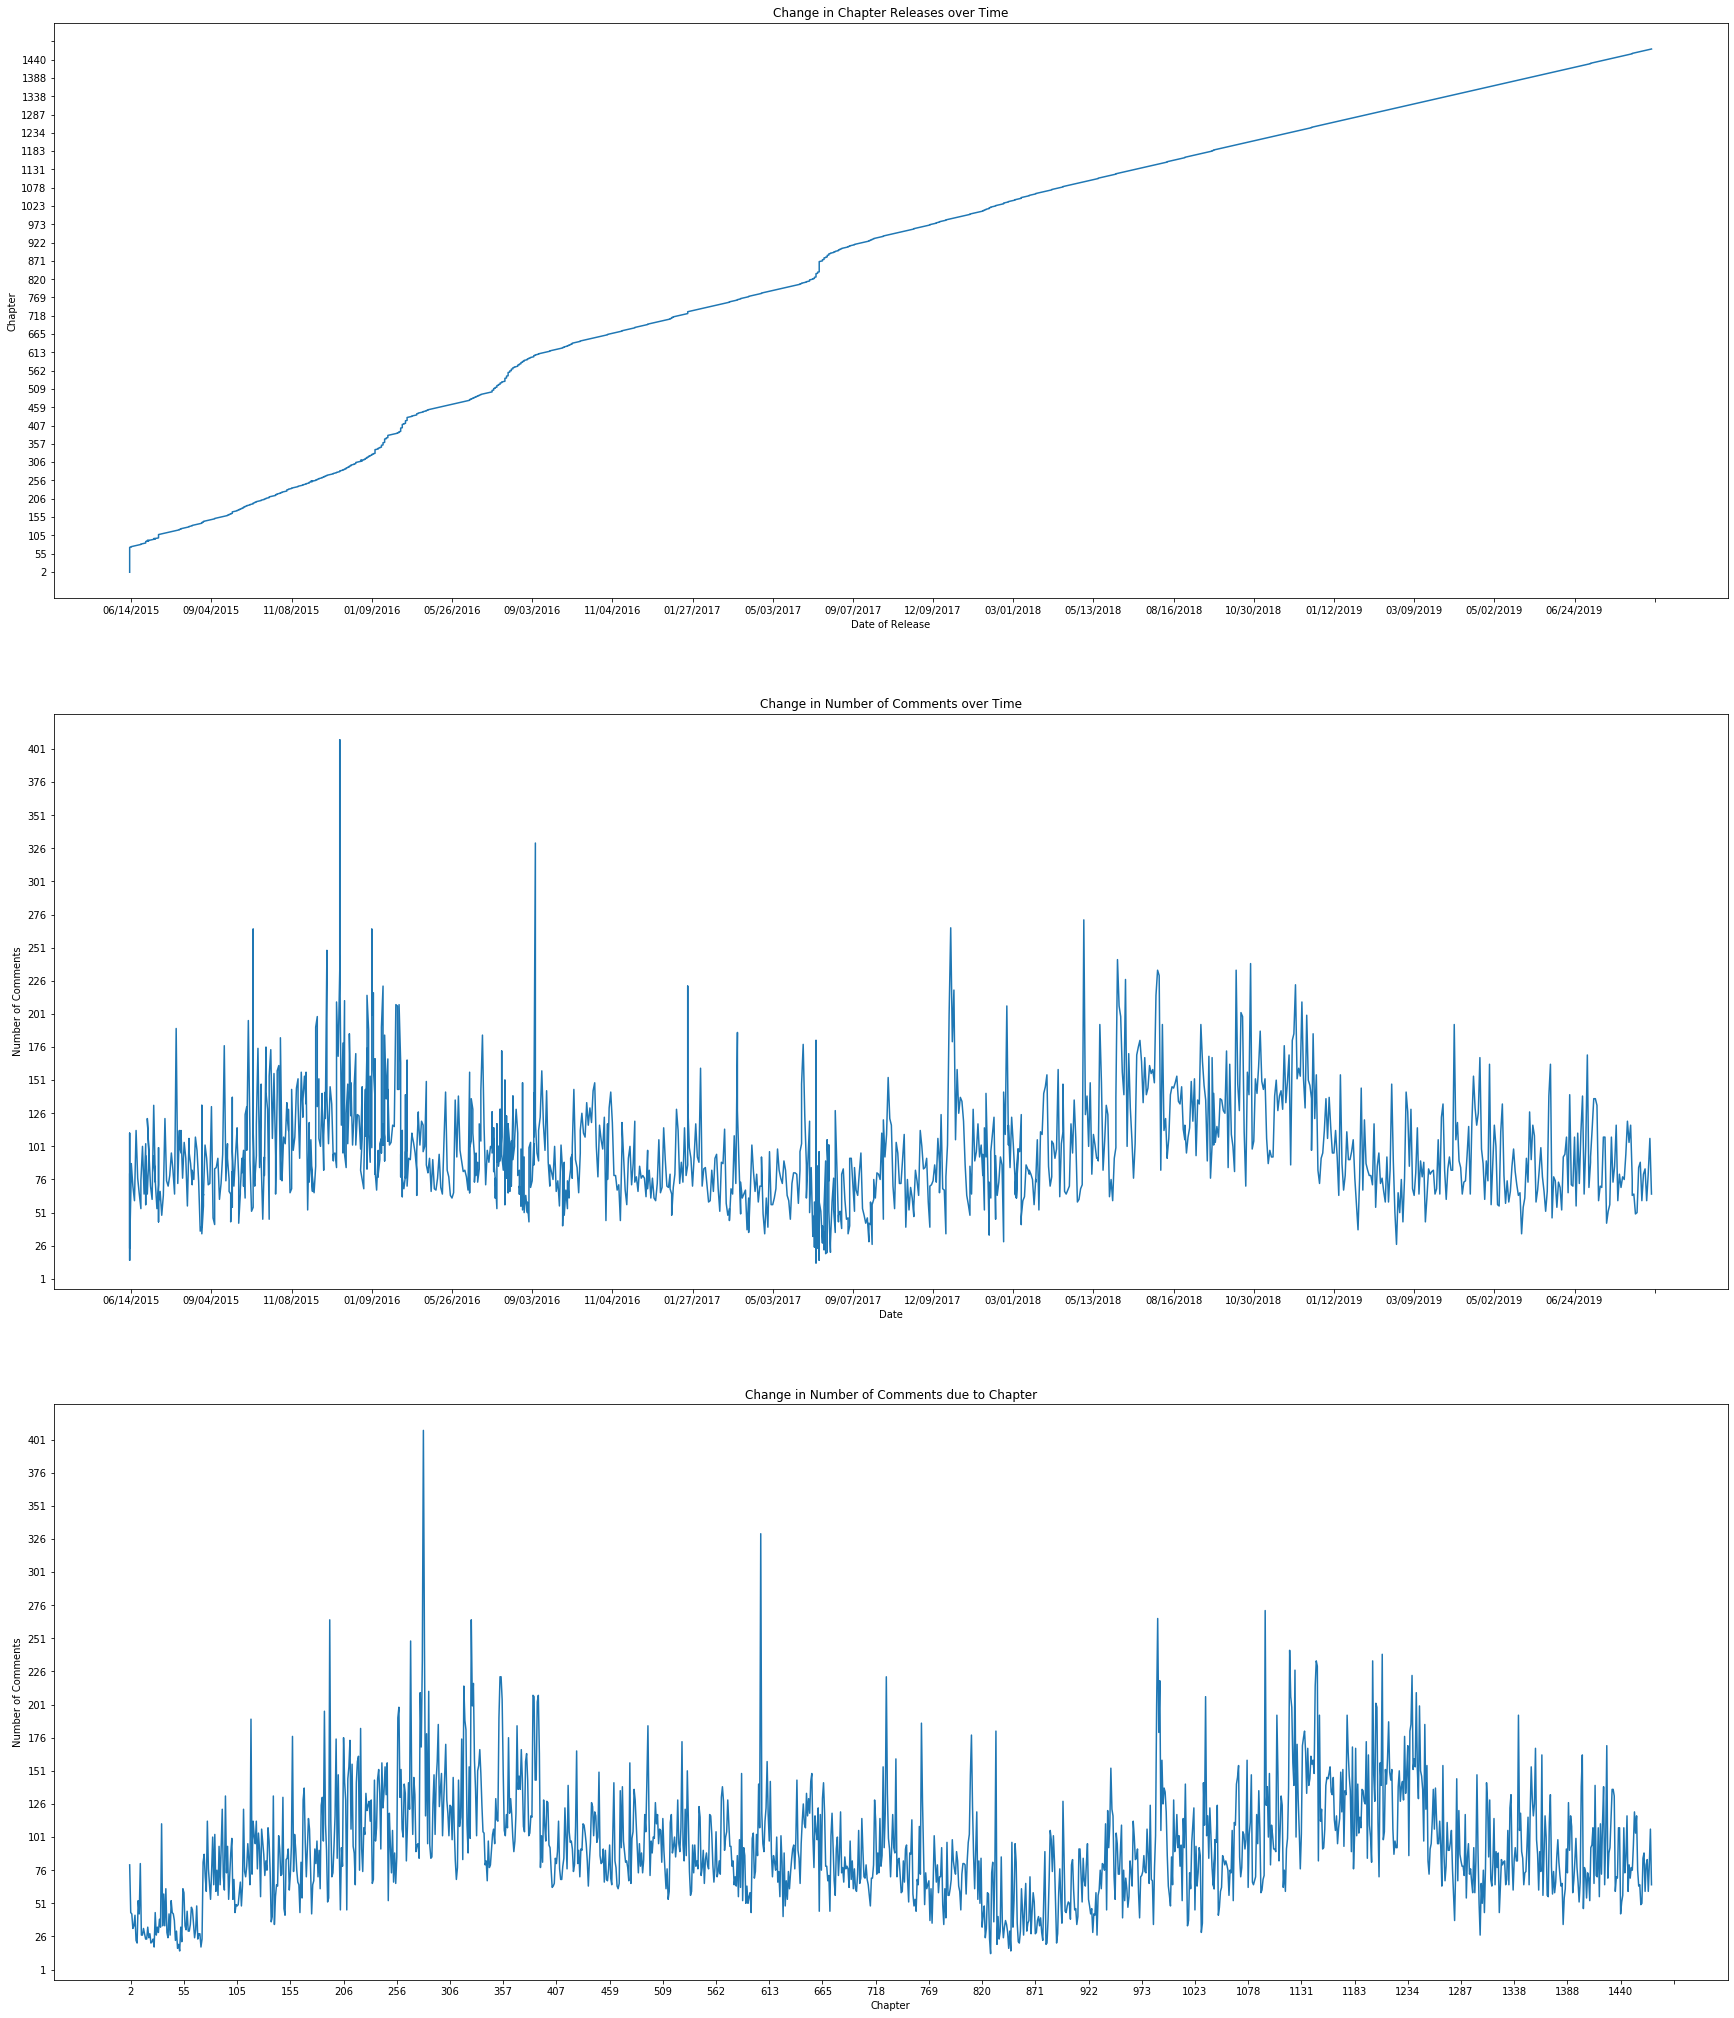

In [65]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure

chaptertick = list(range(1,1500,50))
commenttick = list(range(1,425,25))
datetick = list(range(1,1000,50))

data = pd.read_csv("atg_final_data.csv") 

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols =1,figsize =(30,36))
ax1.plot(data.date, data.chapter)
ax1.set_title('Change in Chapter Releases over Time')
ax1.set_xlabel('Date of Release')
ax1.set_xticks(datetick)
ax1.set_ylabel('Chapter')
ax1.set_yticks(chaptertick)

ax2.plot(data.date, data.comments)
ax2.set_title('Change in Number of Comments over Time')
ax2.set_xlabel('Date')
ax2.set_xticks(datetick)
ax2.set_ylabel('Number of Comments')
ax2.set_yticks(commenttick)

ax3.plot(data.chapter, data.comments)
ax3.set_title('Change in Number of Comments due to Chapter')
ax3.set_xlabel('Chapter')
ax3.set_xticks(chaptertick)
ax3.set_ylabel('Number of Comments')
ax3.set_yticks(commenttick)

plt.show()

[1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951]
